In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import h5py
import shutil

from klusta.launch import klusta as klaunch

In [2]:
# session location
session_path = 'Z:\\Andrey\\data\\GB048\\2021-07-01_14-29-14'
MCS_h5_name = [x for x in os.listdir(session_path) if x.startswith('GB')][0]

## Conversion of MCS .h5 to .dat file

http://neurosuite.sourceforge.net/formats.html


In [28]:
chunk_size = 25000 # 1 second at sampling rate 25kHz
dest_file = os.path.join(session_path, 'all.dat')
if os.path.exists(dest_file):
    os.remove(dest_file)

with h5py.File(os.path.join(session_path, MCS_h5_name), 'r') as f:
    ds = f['Data']['Recording_0']['AnalogStream']['Stream_1']['ChannelData']
    print("Channels: %s, samples: %s" % (ds.shape[0], ds.shape[1]))
    
    chunks_no = int(np.ceil(ds.shape[1]/chunk_size))
    for i in range(chunks_no):
        idx = i * chunk_size
        data = np.array(ds[:, idx:idx + chunk_size]).astype(np.int16)
        with open(dest_file, 'ab') as f:
            data.T.flatten().tofile(f)
            
        print("%s percent complete\r" % str(round(100*(i + 1)/float(chunks_no))), end='')

Channels: 16, samples: 88865000


## Copy Neurosuite settings files

In [13]:
ns_settings_file = 'Z:\\Andrey\\data\\GB048\\all.xml'
kwik_params_file = 'Z:\\Andrey\\data\\GB048\\all.prm'
kwik_probes_file = 'Z:\\Andrey\\data\\GB048\\all.prb'

shutil.copy(ns_settings_file, session_path)
shutil.copy(kwik_params_file, session_path)
shutil.copy(kwik_probes_file, session_path)

'Z:\\Andrey\\data\\GB048\\2021-07-01_14-29-14\\all.prb'

## Run spikesorting with Klusta

https://klusta.readthedocs.io/en/latest/sorting/

In [ ]:
prm_file = os.path.join(session_path, 'all.prm')

os.chdir(session_path)
klaunch(prm_file, output_dir=session_path, overwrite=True, legacy_output=True)

Detecting spikes        :  32%|███████████████▊                                  | 1145/3609 [25:40<1:00:59,  1.49s/it]

## How to read / write .spk files

In [61]:
path_from = os.path.join('D:\\', 'data', '005363', 'all.spk.3')
path_to = os.path.join('D:\\', 'data', '005363', 'all.spk.3.new')

In [58]:
a1 = np.fromfile(path, dtype=np.int16)

In [59]:
channels_no = 8
samples_no  = 50
spikes_no   = int(a1.shape[0]/(channels_no*samples_no))

a2 = a1.reshape([spikes_no, samples_no, channels_no])

In [56]:
# write to .spk
a2.flatten().tofile(path_to)

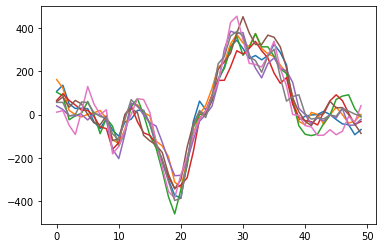

In [60]:
plt.plot(a2[6])

## How to read MCS .h5 / write .dat files

In [39]:
# http://neurosuite.sourceforge.net/formats.html

path_to_h5 = 'Z:\\Michael\\FreeBehaving\\Raw_Dardo\\Neurons\\01-07-2021\\GB048_2021-07-01T14-29-14.h5'

In [38]:
seconds = 60
chunk_size = 25000 # 1 second

with h5py.File(path_to_h5, 'r') as f:
    ds = f['Data']['Recording_0']['AnalogStream']['Stream_1']['ChannelData']
    print(ds.shape) # channels x samples
    
    for i in range(seconds):
        idx = i * chunk_size
        data = np.array(ds[:, idx:idx + chunk_size]).astype(np.int16)
        with open('all.dat', 'ab') as f:
            data.T.flatten().tofile(f)

(16, 88865000)
